In [108]:
# create bankend for Qiskit's AER (QSAM simulator)
from qiskit import Aer
aer_sim = Aer.get_backend('qasm_simulator')
import os
import threading
ionq_token="LAYq6EwdvXqh4sIma2iKZNQ2l7KzbxX6"
from qiskit_ionq import IonQProvider
from qiskit import QuantumCircuit, execute
from threading import Thread, Lock
provider = IonQProvider(ionq_token)
lock = Lock()

# show supported backends
print(provider.backends()) 

# create backends for simulator and hardware
backend_sim = provider.get_backend("ionq_simulator")
backend_qpu = provider.get_backend("ionq_qpu")



[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


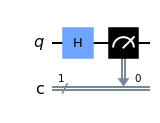

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

qc.draw(output='mpl')

In [84]:
#Perform measurement and add single bit result to a file.
def gen_rand_bit():
    qpu_job = backend_qpu.run(qc, shots = 1)
    counts = qpu_job.get_counts()
    output = list(counts.values())
    
    #Now adding the measurement result to a .txt file
    bits = open("bits.txt", "a")
    bits.write(str((output[0] + 1) % 2))


In [85]:
import time

#Now generate 10000 bits using defined function and measure generation time
start = time.time()
for i in range(10000):
    gen_rand_bit()
    
time = time.time() - start

print(f"Time to generate 10000 bits using 1 shots: {time} seconds")

ConnectionError: HTTPSConnectionPool(host='api.ionq.co', port=443): Max retries exceeded with url: /v0.1/jobs/d20c5683-0af9-4a30-bb77-b97492a2c1d8 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fd6633744d0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [32]:
#Now comparing generation speed with 10000 shots, single circuit instead of 1 shot, 10000 circuits.

start = time.time()
qpu_job = backend_qpu.run(qc, shots = 10000)
counts = qpu_job.get_counts()

#Adding file opening/appending in order to standardize time consumption
bits = open("bits2.txt", "a")
for i in range(10000):
    bits.write("0\n")

time = time.time() - start

print(f"Time to generate 10000 bits using 10000 shots: {time} seconds")

11.63451600074768


In [ ]:
#Defining threaded version of function
def gen_rand_bit():
    qpu_job = backend_qpu.run(qc, shots = 1)
    counts = qpu_job.get_counts()
    output = list(counts.values())
    
    #Now adding the measurement result to a .txt file using lock
    lock.acquire()
    bits = open("bits.txt", "a")
    bits.write(str((output[0] + 1) % 2))
    lock.release()

def gen_1000_bits():
    for i in range(1000):
        gen_rand_bit()

In [ ]:
start = time.time()

t1 = Thread(target = gen_1000_bits)
t2 = Thread(target = gen_1000_bits)
t3 = Thread(target = gen_1000_bits)
t4 = Thread(target = gen_1000_bits)
t5 = Thread(target = gen_1000_bits)
t6 = Thread(target = gen_1000_bits)
t7 = Thread(target = gen_1000_bits)
t8 = Thread(target = gen_1000_bits)
t9 = Thread(target = gen_1000_bits)
t10 = Thread(target = gen_1000_bits)

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()
t7.join()
t8.join()
t9.join()
t10.join()

time = time.time() - start

print(f"Time to generate 10000 bits using 10000 shots: {time} seconds")

In [96]:
type(qpu_job.result())

qiskit_ionq.ionq_result.IonQResult

In [115]:
#Now comparing generation speed with 10000 shots, single circuit instead of 1 shot, 10000 circuits.
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)


start = time.time()
qpu_job = execute(qc, backend = backend_sim, shots = 10, memory = True)
results = qpu_job.result()

memory = results.get_memory(qc)

print(memory)

QiskitError: 'No memory for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fd66416b3d0>". Please verify that you either ran a measurement level 2 job with the memory flag set, eg., "memory=True", or a measurement level 0/1 job.'

In [114]:
print(memory)

{'0': 4973, '1': 5027}
